# Naive Bayes

based off of https://github.com/jakevdp/PythonDataScienceHandbook notebooks

In [2]:
# standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Gaussian Naive Bayes

sample from gaussians

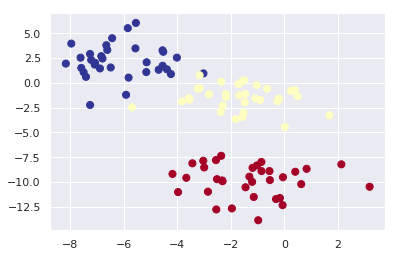

In [10]:
from sklearn.datasets import make_blobs

number_of_clusters = 3
colour_maps = 'RdYlBu'

X, y = make_blobs(100, number_of_clusters, centers=number_of_clusters, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=colour_maps);

# Advanced Chart of naive bayes with gaussian distribution

[(-15, 5), (-8, 8)]

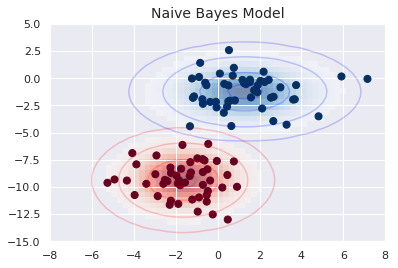

In [30]:
# from appendix

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="RdBu")
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

#fig.savefig('figures/05.05-gaussian-NB.png')

# Model Fitting

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [34]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

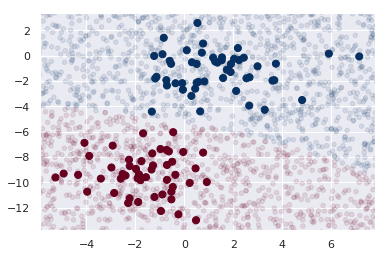

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [36]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial Naive Bayes

In [37]:
# Classifying News Groups

In [38]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [46]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [48]:
print(train.data[5])

From: ibh@dde.dk (Ib Hojme)
Subject: SCSI on dos
Keywords: SCSI, DOS, streamer
Organization: Dansk Data Elektronik A/S
Lines: 23

Hello netters,

	I have a question concerning SCSI on DOS.

	I have a ST01 SCSI controller and two hard-disks conected
	(id's 0 and 1). I'd like to connect a SCSI streamer, but I
	don't have software to access it. Does such a beast exist
	as shareware or PD ?
	
	Also what if I want a third disk ? I know that DOs only can
	"see" two two physical and four logical disks. Will it be
	possible to use extra disks ?

	Thanks in advance.

	Ib

|               | Ib Hojme
|    |   |      | Euromax
|  __| __| __   | Dansk Data Elektronik A/S, Vejle branch, Denmark
| /  |/  |/__>  | Telephone: Int +45 75 72 26 00
| \__/\__/\__   | Fax:       Int +45 75 72 27 76
|               | E-mail:    ibh@dde.dk



In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [50]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

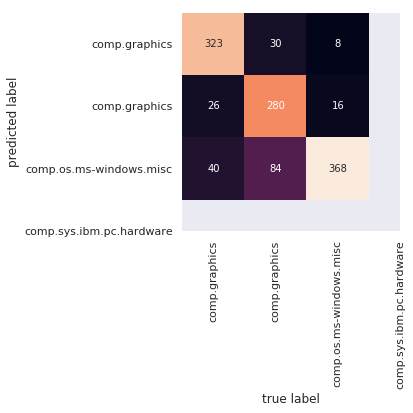

In [51]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [52]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [53]:
predict_category('sending a payload to the ISS')

'comp.sys.ibm.pc.hardware'